# Image Generation Exploration

## Introduction
The goal of this project is to generate images of shirts. 

Well, in theory, anyway.

What this model produces will probably not look like a shirt. If I'm lucky, it *may* look like an image. Fingers crossed.

I have never learned how to generate images and am going entirely off of the silly ideas floating around in my brain that I've been eager to explore. Will this succeed? Almost certainly not, but we can't find out if we don't try!

## Import Dependancies

In [2]:
import torch                      # Tensors with backpropagation.
import pandas as pd               # Data manipulation.
import matplotlib.pyplot as plt   # Graphs and image display.

In [3]:
# Make dataframe of the pixels in fashion images.
training = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")

In [14]:
# Select images with T-shirts/tops.
shirts_df = training[training["label"] == 0].drop(columns=["label"])
shirts_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
10,0,0,0,0,1,0,0,0,0,41,...,164,177,163,0,0,1,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24,0,0,0,0,0,0,0,0,40,122,...,125,93,87,49,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,2,...,154,118,66,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59934,0,0,0,0,0,0,0,0,41,142,...,70,24,0,0,0,0,0,0,0,0
59957,0,0,0,0,0,0,0,0,1,0,...,186,196,200,0,0,3,0,0,0,0
59967,0,0,0,0,0,0,0,2,0,0,...,88,54,0,0,1,0,0,0,0,0
59980,0,0,0,2,0,0,0,0,0,3,...,37,25,9,0,0,0,0,0,0,0


## Examine Data

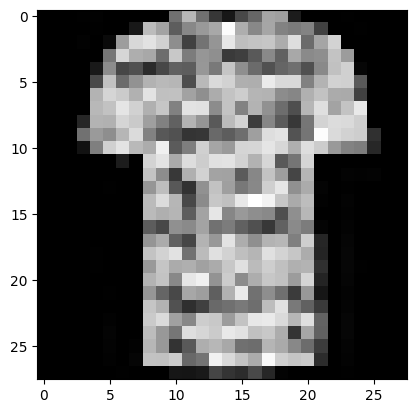

In [5]:
# Convert to a tensor and reshape to fit original image dimensions.
shirts = torch.tensor(shirts_df.values).view(-1, 28, 28)
# Display the first shirt from our data.
plt.imshow(shirts[0], cmap="gray")

In [6]:
shirts.size()

torch.Size([6000, 28, 28])

## Preparing the Data
For this first attempt, we'll start simple. The context for each pixel will be the `block_size` previous pixels. This won't take into account the dimensionality of the image and will most likely work very poorly, but for now we will use it as a baseline.

In [35]:
# Re-flatten shirts for ease of use.
shirts = shirts.view(6000, -1)
block_size = 10
# X contains the contexts.
X = []    # size (6000, block_size).
# y contains the labels, a.k.a. the target pixels' values.
y = []    # size 6000

context = [0] * block_size
# Use a rolling window to get all contexts.
for shirt in shirts[:3]:
    for pixel in shirt.tolist():
        X.append(context)      
        y.append(pixel)
        # Slide window over by removing oldest pixel and adding newest pixel to the end.
        context = context[1:] + [pixel]

X

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 2],
 [0, 0, 0, 0, 0, 0, 0, 1, 2, 0],
 [0, 0, 0, 0, 0, 0, 1, 2, 0, 0],
 [0, 0, 0, 0, 0, 1, 2, 0, 0, 0],
 [0, 0, 0, 0, 1, 2, 0, 0, 0, 0],
 [0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
 [0, 0, 1, 2, 0, 0, 0, 0, 0, 114],
 [0, 1, 2, 0, 0, 0, 0, 0, 114, 183],
 [1, 2, 0, 0, 0, 0, 0, 114, 183, 112],
 [2, 0, 0, 0, 0, 0, 114, 183, 112, 55],
 [0, 0, 0, 0, 0, 114, 183, 112, 55, 23],
 [0, 0, 0, 0, 114, 183, 112, 55, 23, 72],
 [0, 0, 0, 114, 183, 112, 55, 23, 72, 102],
 [0, 0, 114, 183, 112, 55, 23, 72, 102, 165],
 [0, 114, 183, 112, 55, 23, 72, 102, 165, 160],
 [114, 183, 112, 55, 23, 72, 102, 165, 160, 28],
 [183, 112, 55, 23, 72, 102, 165, 160, 28, 0],
 [112, 55, 23, 72, 102, 165, 160, 28, 0, 0],
 [55, 23, 72, 102, 165, 160, 28, 0, 0, 0],
 [23, 72, 102, 165, 160, 28, 0, 0, 0, 1],
 [72, 102, 165, 160, 28, 0, 0, 0, 1, 0]

_____________

## Preparing the Data
For this first attempt, I'll be using previous adjacent pixels as context. Specifically, we'll be using the three pixels above the target and the one pixel to the left of it. (The other adjacent pixels wouldn't have yet been seen by the model.)

We'll need to pad the top and left of the images so that each target pixel can be surrounded by pixels.

To quote the data description, "To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix."

Brainstorming:
More context (more of the pixels surrounding target pixel) can help for better results. So we'll start small, just the pixels directly adjacent. Later, we'll work our way up to selecting more surrounding pixels.

Getting context:
Imagine the context is like a square surrounding the target pixel, but not including any of the pixels within the square that would come after this one. 

(So context is like an isosceles triangle? <- no, that doesn't account for the pixel to the upper right of the target.)

Surrounding square will have dimensions (n, n). n should always be an odd number, since target should be right in the center.

In [15]:
# Context square will have dimensions (n, n).
n = 5
# Find num pixels in square apart from target.
surrounding_pixels = n * n - 1
# We're only looking at pixels on the top half of the surrounding square.
context_size = surrounding_pixels / 2
context_size

12.0

In [ ]:
# context = torch.zeros()
# X contains the contexts.
X = []    # size (6000, context_size).
# y contains the labels, a.k.a. the target pixels' values.
y = []    # size 6000

Psudocode:

    For shirt in shirts:
        context = [0] * context_size
        for pixel in padded_shirt:
            # Fill context here.
            context += 
        X.append(context)

<!-- Say left corner of context square is in position (3, 2). -->
Say target is in position (4, 3). Top left corner of context will be in position n
... 

(n - 1) / 2

<!-- Say pixel is in position (4, 3). Where are the pixels in the context? Assume context square is n x n. Target is always in center of square. So target should be in position x = (4 + n)/2, and y = (3 + n)/2 -->

if square starts at row 0 col 0, 
<!-- target should be in position x = (4 + n)/2, and y = (3 + n)/2. -->
___ of that square.